# **주성분 분석**

# **PCA 클래스**

In [2]:
## 원격데이터 다운로드
!wget https://bit.ly/fruits_300 -O fruits_300.npy

--2023-02-04 10:42:24--  https://bit.ly/fruits_300
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy [following]
--2023-02-04 10:42:24--  https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy [following]
--2023-02-04 10:42:25--  https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443..

In [3]:
## numpy 배열로 변환
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100 * 100)

In [4]:
## 주성분 개수를 50개를 기준으로 PCA 클래스 선언, fit
from sklearn.decomposition import PCA
pca = PCA(n_components = 50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [5]:
## 주성분 벡터 모양 출력
print(pca.components_.shape)

(50, 10000)


In [6]:
## 이미지 출력 준비

import matplotlib.pyplot as plt

def draw_fruits(arr, ratio = 1):
    n = len(arr)
    rows = int(np.ceil(n / 10))
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize = (cols * ratio, rows * ratio), squeeze = False)
    
    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < n:
                axs[i, j].imshow(arr[i * 10 + j], cmap = 'gray_r')
            axs[i, j].axis('off')
    plt.show()

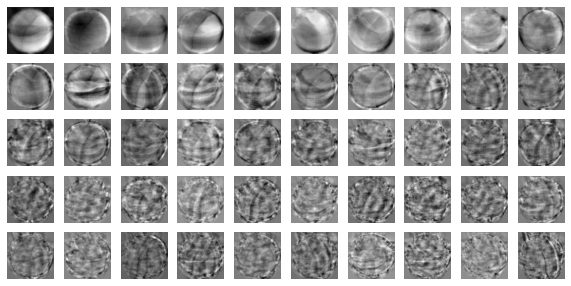

In [7]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [14]:
## PCA 클래스 적용 결과
## 50개의 주성분 벡터 출력
print(fruits_2d.shape)

(300, 10000)


In [13]:
## pca.transform()로 차원 축소 수행 : 10000개 -> 50개
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


# **원본 데이터 재구성**

In [15]:
## 줄어든 차원을 다시 복원 (50개 -> 10000개)
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


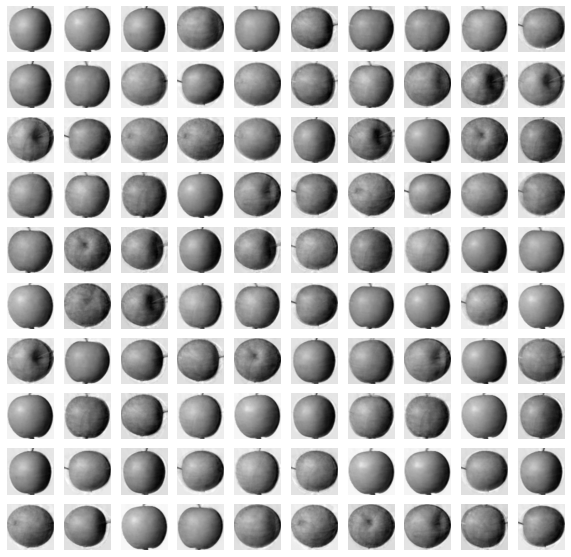

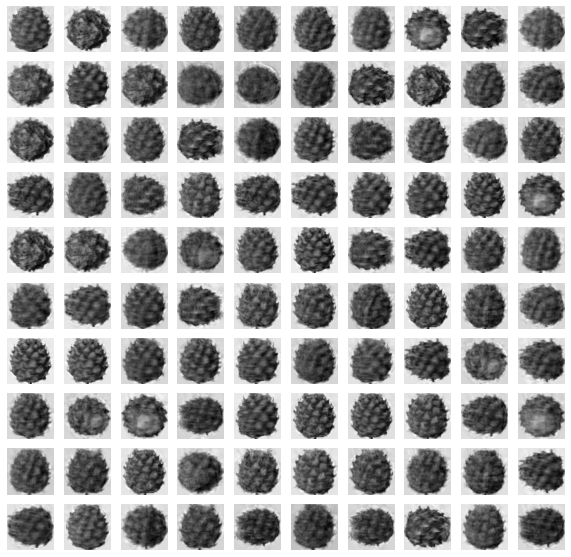

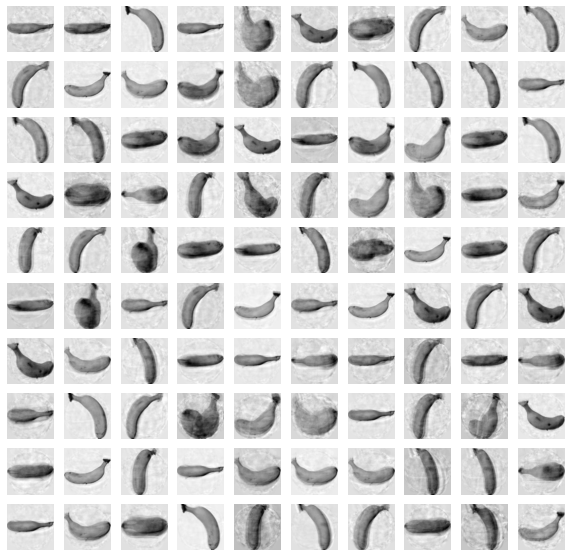

In [16]:
## 이미지 출력을 위해 100x100으로 변환
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start : start + 100])
    print("\n")

이미지 출력, 손실은 되었으나 원본에 가깝게 출력됨

# **설명된 분산**

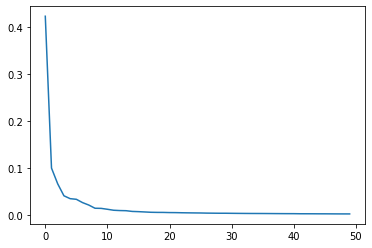

In [17]:
## 설명된 분산
## 차원 축소된 데이터셋에 대한 분산 정도 설명도 출력
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [18]:
## 50개의 차원을 가지고도 92프로 정도 분산을 설명할 수 있음
print(np.sum(pca.explained_variance_ratio_))

0.921547870188811


주성분을 10개 정도로 줄여도 훈련데이터 표현이 가능함


# **다른 알고리즘과 함께 사용하기**

### 로지스틱 회귀에 적용

In [21]:
## 로지스틱 회귀 모델 선언과 타겟 설정
## 로지스틱 회귀 + 차원축소 같이 활용

## 로지스틱 회귀는 지도 학습 -> 과일에 대한 타겟 설정

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [22]:
## 교차 검증 수행

from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.6990791797637939


In [23]:
#PCA로 출소한 fruits_pca를 사용했을 때와 비교하기
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.06611075401306152


비교 결과:

In [25]:
## 0.5(50%)의 설명된 분산 비율로 PCA 수행
pca = PCA(n_components = 0.5)
pca.fit(fruits_2d)

print(pca.n_components_)

2


In [27]:
## 타겟 데이터
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [28]:
# 2개의 특성만 사용하고도 교차 검증의 결과가 좋은 것인지 확인하기
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.99
0.03826289176940918


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

### 군집에 적용

In [30]:
## 3개의 클러스터 분류 수행
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts = True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


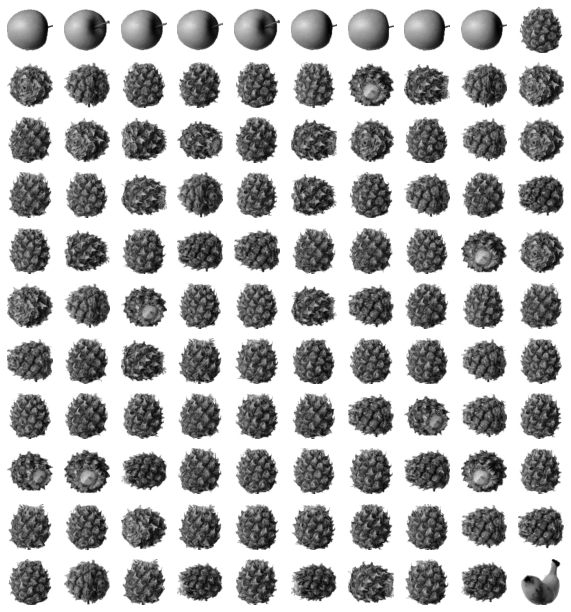

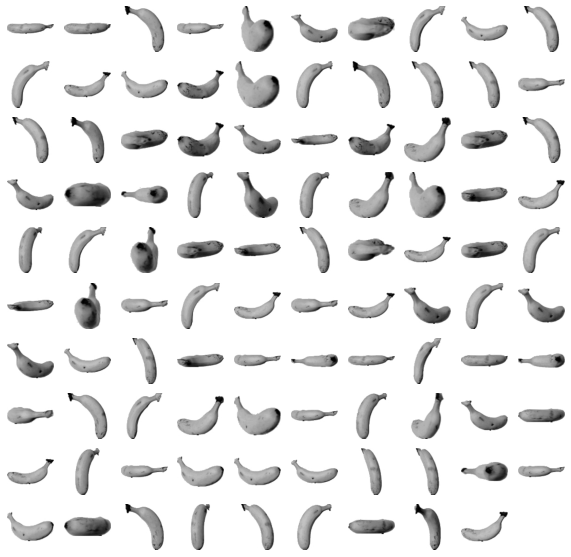

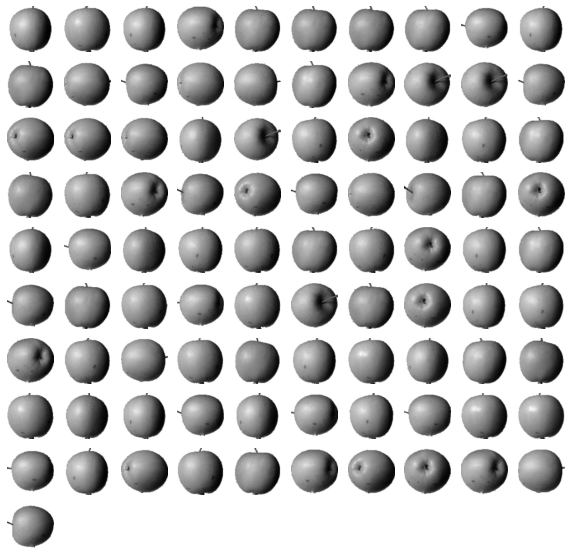

In [31]:
#KMeans가 찾은 레이블을 사용하여 과일 이미지 출력하기
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

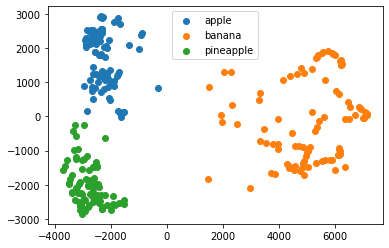

In [32]:
## 클러스터링에 대한 분포도 출력
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:, 0], data[:, 1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()